Bank Marketing Analysis Report 

Griffith Univesity

Gabriela Almeida Monteiro - s5198626 

Jason Dias - s5216366

Julio Pimentel Albores – s5172620 

# Data exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, model_selection, linear_model, metrics
from collections import Counter
from imblearn.under_sampling import NearMiss


In [3]:
#Read bank-full.csv file 
df = pd.read_csv('bank-full.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# 1. Data Exploration 

In [4]:
#Data type and null values for each column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


In [5]:
#Review the first 5 values 
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


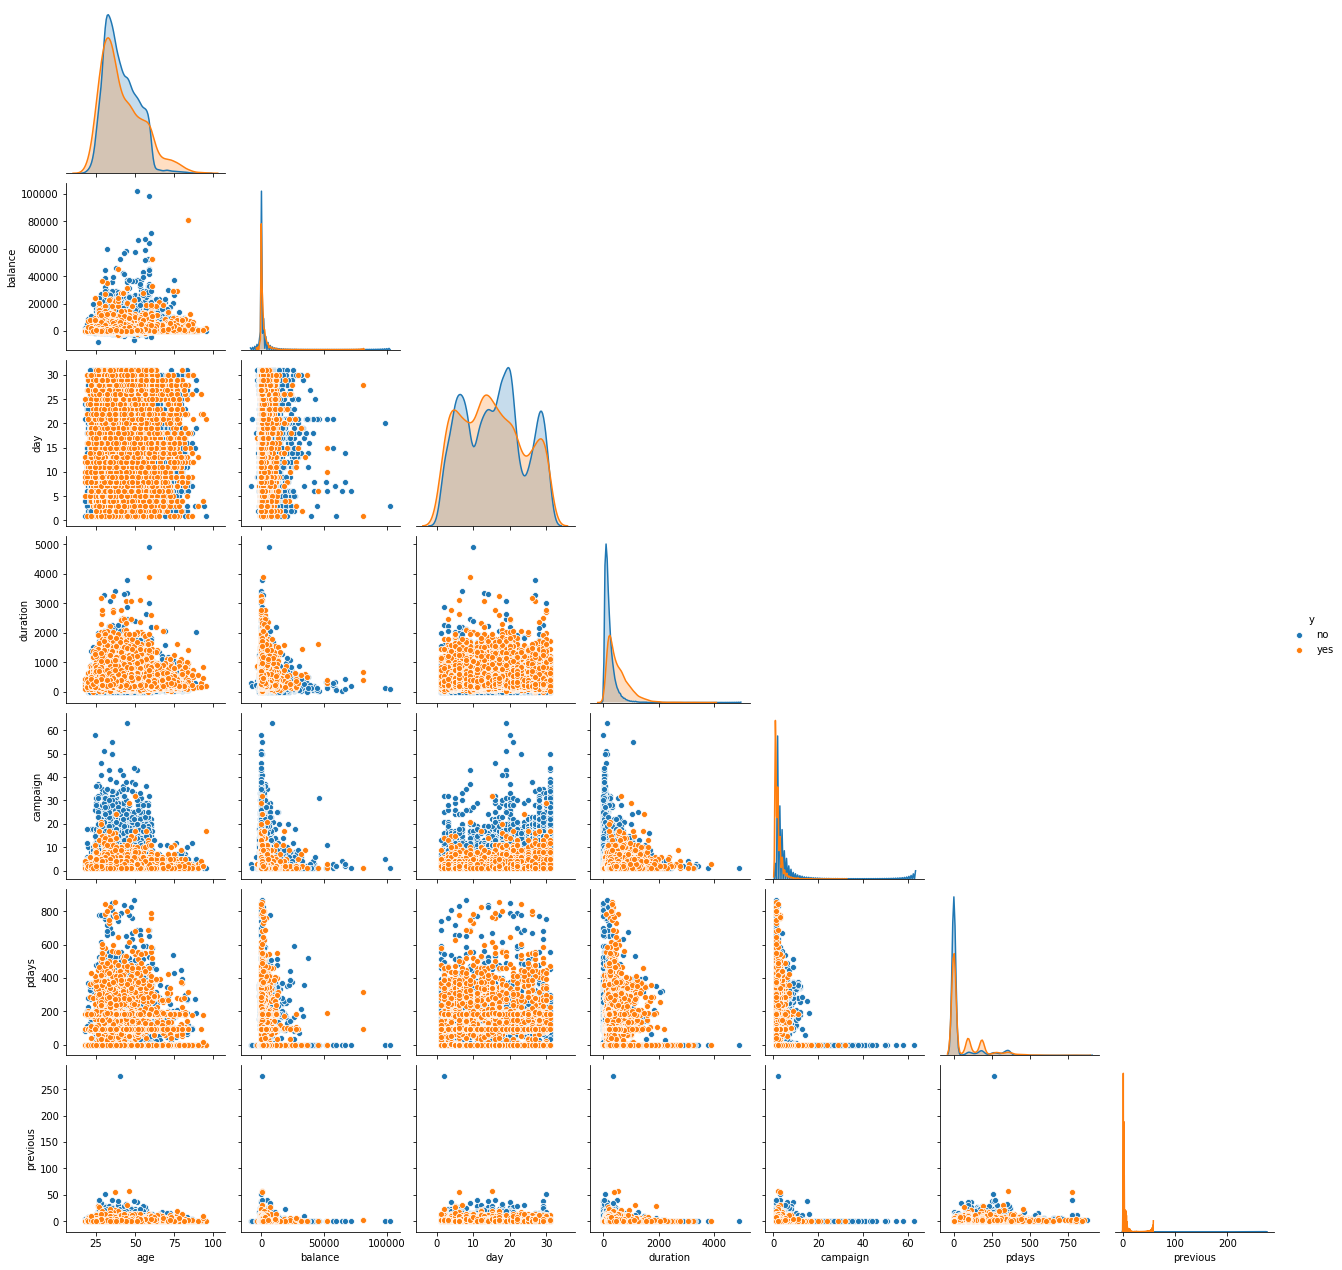

In [61]:
# #Plot numerical values 
sns.pairplot(df,hue='y',corner=True)

In [7]:
#Statistical information from numerical columns 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Check unique values of object columns. Define if some of the columns will be transformed using one hot encoder. 

In [8]:
#multilabel
col=1
print('Column {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#3 labels
col=2
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#multilabel
col=3
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#2 labels
col=4
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#2 labels
col=6
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#2 labels
col=7
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#3 labels
col=8
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#months in text - 12 labels
col=10
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#multilabel
col=15
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())

#multilabel
col=16
print('\nColumn {} ({}) unique values:'.format(col,df.columns[col]))
print(df.iloc[:,col].value_counts())


Column 1 (job) unique values:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Column 2 (marital) unique values:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Column 3 (education) unique values:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Column 4 (default) unique values:
no     44396
yes      815
Name: default, dtype: int64

Column 6 (housing) unique values:
yes    25130
no     20081
Name: housing, dtype: int64

Column 7 (loan) unique values:
no     37967
yes     7244
Name: loan, dtype: int64

Column 8 (contact) unique values:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Column 10 (month) unique values:
may    

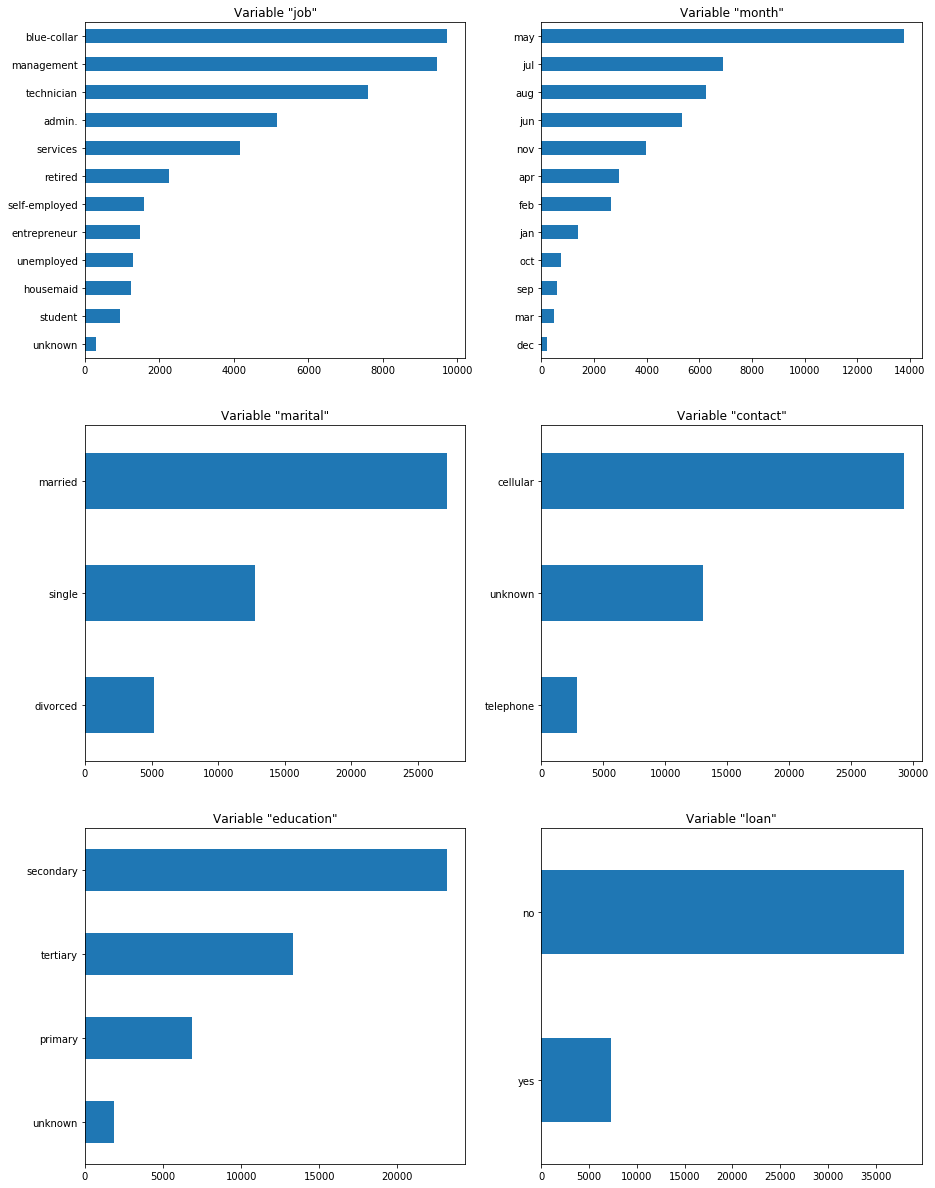

In [9]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize = (15,21))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

col=1
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[0,0])

col=2
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[1,0])

col=3
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[2,0])

col=7
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[2,1])

col=8
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[1,1])

col=10
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[0,1])

plt.show()


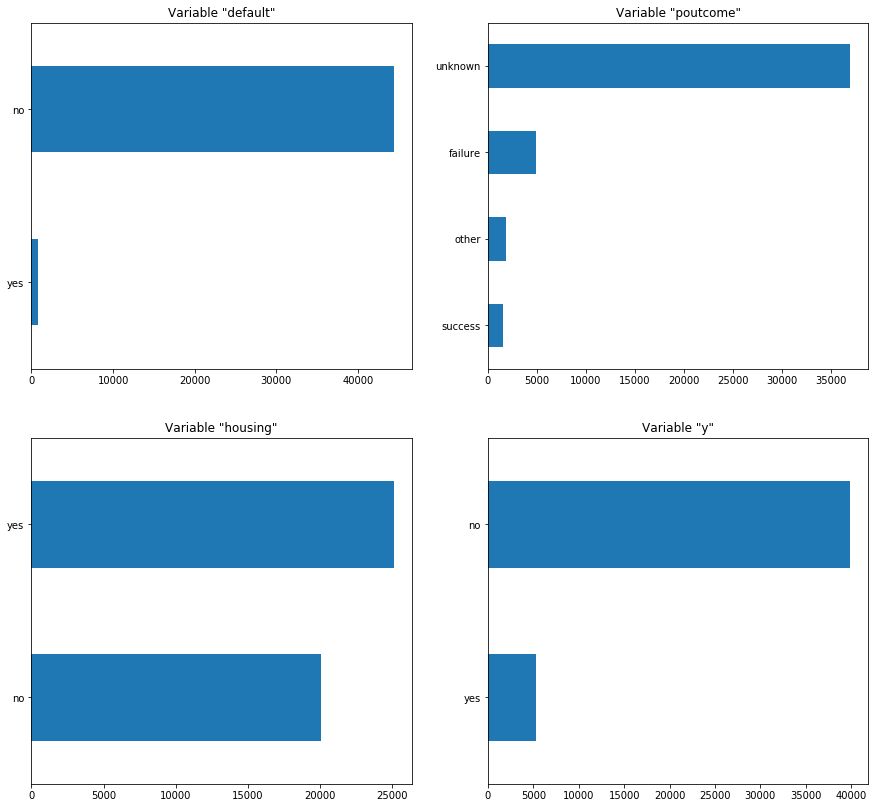

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (15,14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)


col=4
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[0,0])

col=6
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[1,0])

col=15
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[0,1])

col=16
df[df.columns[col]].value_counts().sort_values().plot(kind='barh',title='Variable "'+df.columns[col]+'"', ax = axs[1,1])

plt.show()

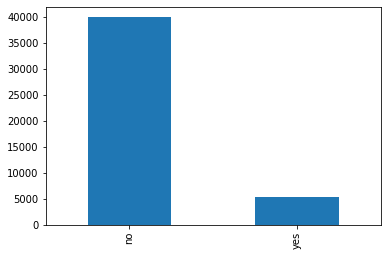

In [11]:
df['y'].value_counts().plot(kind = 'bar')

In [12]:
# This data set contains an imbalanced target variable.
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

Analyse different variables to find a specific category has more chances of getting a term deposit. 

Positive values imply this category favors clients that will subscribe and negative values categories that favour not buying

## 1.1 Job sector variable

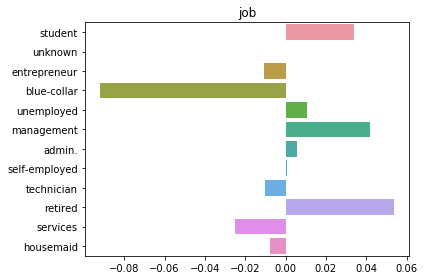

In [13]:
feature_name="job"
pos_count = df.loc[df.y.values == 'yes', feature_name].value_counts()
neg_count = df.loc[df.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_count.index) + list(neg_count.index)))

#Count of how often each outcome was recorded
freq_pos = (df.y.values == 'yes').sum()
freq_neg = (df.y.values =='no').sum()

pos_counts = pos_count.to_dict()
neg_counts = neg_count.to_dict()
all_index= list(all_counts)

all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

Blue-collar jobs are less likely to get a term deposit. Meanwhile, retired, management and student jobs are more likely to get a term deposit. 

## 1.2 Marital status variable

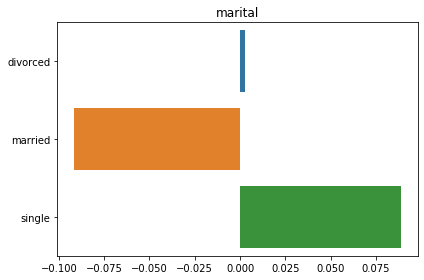

In [14]:
feature_name="marital"
pos_count = df.loc[df.y.values == 'yes', feature_name].value_counts()
neg_count = df.loc[df.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_count.index) + list(neg_count.index)))

#Count of how often each outcome was recorded
freq_pos = (df.y.values == 'yes').sum()
freq_neg = (df.y.values =='no').sum()

pos_counts = pos_count.to_dict()
neg_counts = neg_count.to_dict()
all_index= list(all_counts)

all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

Here we can see that customers who are single are mostly likely in accepting term deposits


## 1.3 Previous loan variable

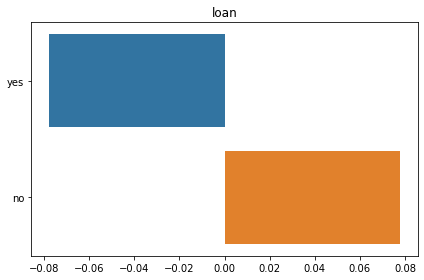

In [15]:
feature_name="loan"
pos_count = df.loc[df.y.values == 'yes', feature_name].value_counts()
neg_count = df.loc[df.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_count.index) + list(neg_count.index)))

#Count of how often each outcome was recorded
freq_pos = (df.y.values == 'yes').sum()
freq_neg = (df.y.values =='no').sum()

pos_counts = pos_count.to_dict()
neg_counts = neg_count.to_dict()
all_index= list(all_counts)

all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

By observing the above diagram we can say that people who have not taken a loan have applied for term deposit

## 1.4 Month variable 

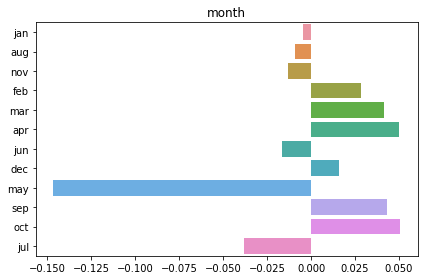

In [16]:
feature_name="month"
pos_count = df.loc[df.y.values == 'yes', feature_name].value_counts()
neg_count = df.loc[df.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_count.index) + list(neg_count.index)))

#Count of how often each outcome was recorded
freq_pos = (df.y.values == 'yes').sum()
freq_neg = (df.y.values =='no').sum()

pos_counts = pos_count.to_dict()
neg_counts = neg_count.to_dict()
all_index= list(all_counts)

all_counts = [pos_counts.get(k,0) / freq_pos - neg_counts.get(k,0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

With the above analysis, we can say that during the months of March, April, September and October is more likely to get a term posit. Meanwhile, May and July are the less likely to get a term deposit. 

# 2. Data Cleaning 

In [63]:
#Remove 'contact' and 'poutcome' columns because they have large number of unknown values
df_clean=df.drop(columns=['contact','poutcome'])
df_clean.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no


## 2.1 Education column

In [64]:
#Remove rows when 'education' has 'unknown' values
df_clean=df_clean[df_clean['education']!='unknown']
print('Df has {} values'.format(len(df_clean)))

Df has 43354 values


## 2.2 Job column 

In [65]:
#Remove rows when 'job' has 'unknown' values

df_clean = df_clean[df_clean['job']!='unknown']
print('Df has {} values'.format(len(df_clean)))


Df has 43193 values


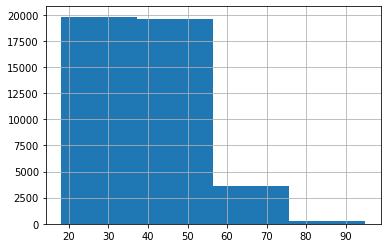

In [22]:
df_clean.age.hist(bins=4)

## 2.3 Age column

In [66]:
#Divide the age in 4 bins
bins=4

#Define variables to split the 'age' column
age_max=df_clean.age.max()
age_min=df_clean.age.min()
range_age=age_max-age_min
dist_age=range_age/bins

lim_min=age_min
lim_max=age_min + dist_age
sum_vals=0

for times in range(bins):
    col_name='age_'+str(int(lim_min))+'_'+str(int(lim_max))
    df_clean[col_name]=((df_clean.age >= lim_min) & (df_clean.age < lim_max)) *1
    df_temp=df_clean[(df_clean.age >= lim_min) & (df_clean.age < lim_max)]
    sum_vals+=len(df_temp)
    print(sum_vals, len(df_temp))

    lim_min=lim_max
    lim_max+=dist_age
    
df_clean=df_clean.drop(columns=['age'])
df_clean.head()

19804 19804
39393 19589
42966 3573
43191 225


,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,age_18_37,age_37_56,age_56_75,age_75_95
0,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no,0,0,1,0
1,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no,0,1,0,0
2,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no,1,0,0,0
5,management,married,tertiary,no,231,yes,no,5,may,139,1,-1,0,no,1,0,0,0
6,management,single,tertiary,no,447,yes,yes,5,may,217,1,-1,0,no,1,0,0,0


## 2.4 Month column

In [67]:
#Transform month in trimesters
df_clean['month_T1']=df_clean.month.isin(['jan','feb','mar','apr'])*1
df_clean['month_T2']=df_clean.month.isin(['may','jun','jul','ago'])*1
df_clean['month_T3']=df_clean.month.isin(['sep','oct','nov','dic'])*1

#Remove month column
df_clean=df_clean.drop(columns=['month'])
df_clean.head()

,job,marital,education,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,age_18_37,age_37_56,age_56_75,age_75_95,month_T1,month_T2,month_T3
0,management,married,tertiary,no,2143,yes,no,5,261,1,-1,0,no,0,0,1,0,0,1,0
1,technician,single,secondary,no,29,yes,no,5,151,1,-1,0,no,0,1,0,0,0,1,0
2,entrepreneur,married,secondary,no,2,yes,yes,5,76,1,-1,0,no,1,0,0,0,0,1,0
5,management,married,tertiary,no,231,yes,no,5,139,1,-1,0,no,1,0,0,0,0,1,0
6,management,single,tertiary,no,447,yes,yes,5,217,1,-1,0,no,1,0,0,0,0,1,0


## 2.5 Day column

In [68]:
#Group the column in 10 days bin 
df_clean['day_1_10']=((df_clean.day > 0) & (df_clean.day <= 10))*1
df_clean['day_11_20']=((df_clean.day > 10) & (df_clean.day <= 20))*1
df_clean['day_21_31']=(df_clean.day > 20)*1

#Remove month column
df_clean=df_clean.drop(columns=['day'])
df_clean.head()

,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,age_18_37,age_37_56,age_56_75,age_75_95,month_T1,month_T2,month_T3,day_1_10,day_11_20,day_21_31
0,management,married,tertiary,no,2143,yes,no,261,1,-1,...,0,0,1,0,0,1,0,1,0,0
1,technician,single,secondary,no,29,yes,no,151,1,-1,...,0,1,0,0,0,1,0,1,0,0
2,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,...,1,0,0,0,0,1,0,1,0,0
5,management,married,tertiary,no,231,yes,no,139,1,-1,...,1,0,0,0,0,1,0,1,0,0
6,management,single,tertiary,no,447,yes,yes,217,1,-1,...,1,0,0,0,0,1,0,1,0,0


## 2.6 Default, housing, loan columns

In [69]:
# #transform 'yes', 'no' to numerical values
df_clean.default=df_clean.default.map(dict(yes=1, no=0))
df_clean.housing=df_clean.housing.map(dict(yes=1, no=0))
df_clean.loan=df_clean.loan.map(dict(yes=1, no=0))
df_clean.y=df_clean.y.map(dict(yes=1, no=0))

df_clean.head()


,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,...,age_18_37,age_37_56,age_56_75,age_75_95,month_T1,month_T2,month_T3,day_1_10,day_11_20,day_21_31
0,management,married,tertiary,0,2143,1,0,261,1,-1,...,0,0,1,0,0,1,0,1,0,0
1,technician,single,secondary,0,29,1,0,151,1,-1,...,0,1,0,0,0,1,0,1,0,0
2,entrepreneur,married,secondary,0,2,1,1,76,1,-1,...,1,0,0,0,0,1,0,1,0,0
5,management,married,tertiary,0,231,1,0,139,1,-1,...,1,0,0,0,0,1,0,1,0,0
6,management,single,tertiary,0,447,1,1,217,1,-1,...,1,0,0,0,0,1,0,1,0,0


In [70]:
df_clean.columns

Index(['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'age_18_37',
       'age_37_56', 'age_56_75', 'age_75_95', 'month_T1', 'month_T2',
       'month_T3', 'day_1_10', 'day_11_20', 'day_21_31'],
      dtype='object')

## 2.7 Job, marital, education columns

In [71]:
#Perform one hot encoding for the categorical features
one_hot_encoding = pd.get_dummies(df_clean.iloc[:,[0,1,2]])
df_clean=pd.concat([df_clean,one_hot_encoding],axis=1)
df_clean=df_clean.drop(columns=['job','marital','education'])

df_clean.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,y,age_18_37,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,0,2143,1,0,261,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,29,1,0,151,1,-1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,2,1,1,76,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
5,0,231,1,0,139,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
6,0,447,1,1,217,1,-1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


In [72]:
df_clean.columns

Index(['default', 'balance', 'housing', 'loan', 'duration', 'campaign',
       'pdays', 'previous', 'y', 'age_18_37', 'age_37_56', 'age_56_75',
       'age_75_95', 'month_T1', 'month_T2', 'month_T3', 'day_1_10',
       'day_11_20', 'day_21_31', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary'],
      dtype='object')

## 2.8 Balance, duration, campaign, pdays, previous columns

In [73]:
#Perform normalisatin to numerical columns
from sklearn.preprocessing import StandardScaler

df_clean[['balance', 'duration', 'campaign', 
          'pdays','previous']]=StandardScaler().fit_transform(df_clean[['balance', 'duration', 
                                                                        'campaign', 'pdays','previous']])
df_clean.head()

,default,balance,housing,loan,duration,campaign,pdays,previous,y,age_18_37,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
0,0,0.259354,1,0,0.010368,-0.573827,-0.412311,-0.25073,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,-0.435568,1,0,-0.415726,-0.573827,-0.412311,-0.25073,0,0,...,0,0,1,0,0,0,1,0,1,0
2,0,-0.444443,1,1,-0.706245,-0.573827,-0.412311,-0.25073,0,1,...,0,0,0,0,0,1,0,0,1,0
5,0,-0.369166,1,0,-0.462209,-0.573827,-0.412311,-0.25073,0,1,...,0,0,0,0,0,1,0,0,0,1
6,0,-0.298161,1,1,-0.160070,-0.573827,-0.412311,-0.25073,0,1,...,0,0,0,0,0,0,1,0,0,1


## 2.9 Get only the most relevant variables

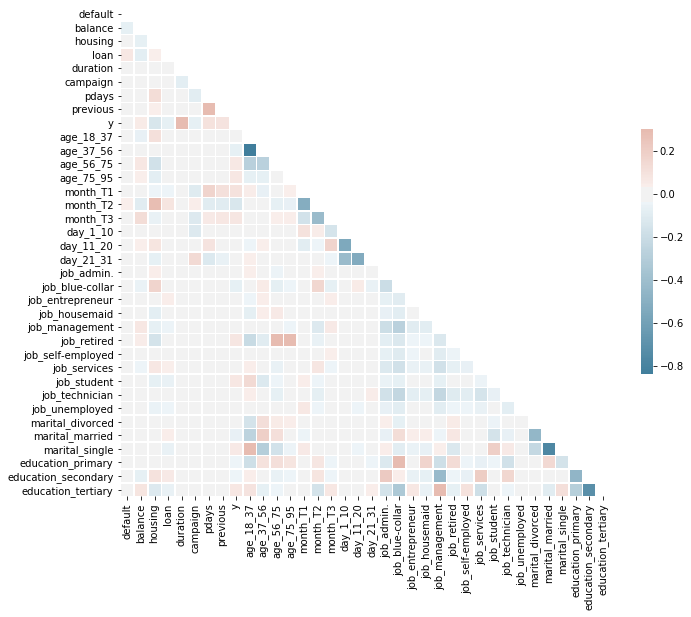

In [74]:
## Correlation matrix

import seaborn as sns 

# Compute the correlation matrix
corr = df_clean.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
corr.y.apply(abs).sort_values(ascending=False)

y                      1.000000
duration               0.397393
housing                0.138300
month_T2               0.128929
pdays                  0.101446
month_T1               0.098599
previous               0.091764
job_retired            0.078686
month_T3               0.078435
age_75_95              0.075101
job_student            0.073955
campaign               0.072465
age_37_56              0.071115
job_blue-collar        0.070973
education_tertiary     0.070523
loan                   0.068802
age_56_75              0.067825
marital_single         0.064084
marital_married        0.060928
balance                0.051386
education_primary      0.040155
education_secondary    0.035901
job_management         0.032032
job_services           0.028754
default                0.023244
age_18_37              0.022596
job_unemployed         0.021305
day_1_10               0.019947
job_entrepreneur       0.019513
day_11_20              0.015842
job_housemaid          0.014936
job_tech

In [75]:
top_variables=corr.y.apply(abs).sort_values(ascending=False)[:7].index
top_variables

Index(['y', 'duration', 'housing', 'month_T2', 'pdays', 'month_T1',
       'previous'],
      dtype='object')

In [76]:
df_reduce=df_clean[top_variables]
df_reduce.head()

,y,duration,housing,month_T2,pdays,month_T1,previous
0,0,0.010368,1,1,-0.412311,0,-0.25073
1,0,-0.415726,1,1,-0.412311,0,-0.25073
2,0,-0.706245,1,1,-0.412311,0,-0.25073
5,0,-0.462209,1,1,-0.412311,0,-0.25073
6,0,-0.160070,1,1,-0.412311,0,-0.25073


## 2.10 Apply Feature Reduction using Principal Components

In [78]:
from sklearn.decomposition import PCA

X1 = df_clean.drop(columns=['y'])
n = 15
pca = PCA(n_components= n)
principalComponents = pca.fit_transform(X1)
principalDf = pd.DataFrame(data = principalComponents)

pca.explained_variance_ratio_[:n].sum()

# 15 components explain 90% of the variance.

0.900200653879968

## 2.11 Define final predictors and target variable

In [79]:
y = df_clean['y']
X1 = df_clean.drop(columns=['y'])
X2 = df_reduce.drop(columns=['y'])
X3 = principalDf

## 2.12 Verify Class Imbalance occurs

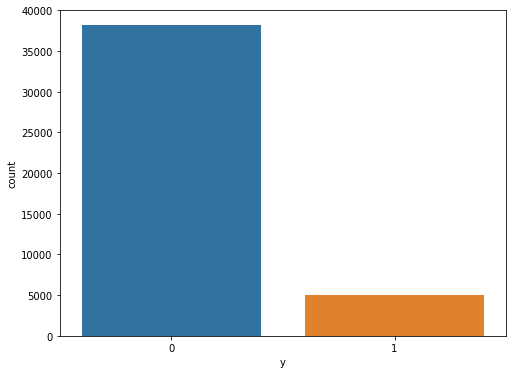

In [81]:
plt.rcParams["figure.figsize"] = (8, 6)
df_clean['y'].value_counts()
sns.countplot(x = 'y', data=df_clean)
plt.show()

# 3. Models deployment

In [172]:
# Function to be used for all models in order to simply the coding

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE


def fit_classifier(model_name, X, y):
    '''takes the name of the model, the predictors, target variable, and
    prints the confusion matrix, accuracy score and classification report.
    An undersampling strategy is used after splitting the data.'''
    
    # split the dataset before undersampling
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021, train_size = 0.8, shuffle = True)

    
    # Apply undersampling to the training set
    # define the undersampling method
    undersample = NearMiss(version=3, n_neighbors=10, sampling_strategy=0.2)
    # transform the dataset
    X_under, y_under = undersample.fit_resample(X_train, y_train)
    X_train = X_under
    y_train = y_under
    
    #Training the model 
    my_model = model_name # Train the model
    my_model.fit(X_train, y_train) # fit the model
    pred = my_model.predict(X_test) # Predict the response

    #Creating a confusion matrix 
    conf_mat= metrics.confusion_matrix(y_test, pred)
    conf_mat_df=pd.DataFrame(conf_mat, index=['no','yes'], columns=['no','yes'] )
    print("----------- CONFUSION MATRIX ------------------------")
    print(conf_mat_df,'\n\n')

    # Model Accuracy: how often is the classifier correct?
    print("----------- ACCURACY --------------------------------")
    print("Accuracy:",metrics.accuracy_score(y_test, pred),'\n\n')
    print("----------- CLASSIFICATION REPORT -------------------")
    print(metrics.classification_report(y_test, pred))
    
    
    return [round(metrics.precision_score(y_test, pred),3), 
            round(metrics.recall_score(y_test, pred),3), 
            round(metrics.f1_score(y_test, pred),3),
           round(metrics.accuracy_score(y_test, pred),3)]




In [205]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingClassifier


#Define the parameters of the model 
logistic_reg = linear_model.LogisticRegression()
sup_vector_linear = svm.SVC(kernel = 'linear')
sup_vector_rbf = svm.SVC(kernel = 'rbf')
sup_vector_poly = svm.SVC(kernel = 'poly')
decision_tree=DecisionTreeClassifier()
ran_classifier = RandomForestClassifier()


## 3.1 Logistic regression

### 3.1.1 All variables

In [206]:
metrics_model = fit_classifier(logistic_reg, X1, y)
models_measurements=pd.DataFrame([['Logistic regression', 'All variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7398  217
yes   756  268 


----------- ACCURACY --------------------------------
Accuracy: 0.8873712235212409 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7615
           1       0.55      0.26      0.36      1024

    accuracy                           0.89      8639
   macro avg       0.73      0.62      0.65      8639
weighted avg       0.87      0.89      0.87      8639



### 3.1.2 Most relevant variables

In [207]:
metrics_model = fit_classifier(logistic_reg, X2, y)
models_measurements=models_measurements.append([['Logistic regression', 'Most relevant variables']+metrics_model])


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7461  154
yes   795  229 


----------- ACCURACY --------------------------------
Accuracy: 0.8901493228382915 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7615
           1       0.60      0.22      0.33      1024

    accuracy                           0.89      8639
   macro avg       0.75      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639



C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


### 3.1.3 PCA variables

In [208]:
metrics_model = fit_classifier(logistic_reg, X3, y)
models_measurements=models_measurements.append([['Logistic regression', 'PCA variables']+metrics_model])


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7446  169
yes   790  234 


----------- ACCURACY --------------------------------
Accuracy: 0.8889917814561871 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7615
           1       0.58      0.23      0.33      1024

    accuracy                           0.89      8639
   macro avg       0.74      0.60      0.63      8639
weighted avg       0.87      0.89      0.87      8639



C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


## 3.2 Support Vector Machine - linear

### 3.2.1 All variables

In [209]:
metrics_model = fit_classifier(sup_vector_linear, X1, y)
models_measurements=models_measurements.append([['SVM linear', 'All variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7386  229
yes   836  188 


----------- ACCURACY --------------------------------
Accuracy: 0.8767218428058803 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      7615
           1       0.45      0.18      0.26      1024

    accuracy                           0.88      8639
   macro avg       0.67      0.58      0.60      8639
weighted avg       0.85      0.88      0.85      8639



### 3.2.2 Most relevant variables

In [210]:
metrics_model = fit_classifier(sup_vector_linear, X2, y)
models_measurements=models_measurements.append([['SVM linear', 'Most relevant variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7555   60
yes   932   92 


----------- ACCURACY --------------------------------
Accuracy: 0.8851718948952425 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7615
           1       0.61      0.09      0.16      1024

    accuracy                           0.89      8639
   macro avg       0.75      0.54      0.55      8639
weighted avg       0.86      0.89      0.85      8639



### 3.2.3 PCA variables

In [211]:
metrics_model = fit_classifier(sup_vector_linear, X3, y)
models_measurements=models_measurements.append([['SVM linear', 'PCA variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7538   77
yes   895  129 


----------- ACCURACY --------------------------------
Accuracy: 0.8874869776594513 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7615
           1       0.63      0.13      0.21      1024

    accuracy                           0.89      8639
   macro avg       0.76      0.56      0.57      8639
weighted avg       0.86      0.89      0.85      8639



## 3.3 Support Vector Machine - rbf

### 3.3.1 All variables

In [212]:
metrics_model = fit_classifier(sup_vector_rbf, X1, y)
models_measurements=models_measurements.append([['SVM rbf', 'All variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7385  230
yes   662  362 


----------- ACCURACY --------------------------------
Accuracy: 0.8967473087162866 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7615
           1       0.61      0.35      0.45      1024

    accuracy                           0.90      8639
   macro avg       0.76      0.66      0.70      8639
weighted avg       0.88      0.90      0.88      8639



### 3.3.2 Most relevant variables

In [213]:
metrics_model = fit_classifier(sup_vector_rbf, X2, y)
models_measurements=models_measurements.append([['SVM rbf', 'Most relevant variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7412  203
yes   714  310 


----------- ACCURACY --------------------------------
Accuracy: 0.8938534552610256 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7615
           1       0.60      0.30      0.40      1024

    accuracy                           0.89      8639
   macro avg       0.76      0.64      0.67      8639
weighted avg       0.88      0.89      0.88      8639



### 3.3.3 PCA variables

In [214]:
metrics_model = fit_classifier(sup_vector_rbf, X3, y)
models_measurements=models_measurements.append([['SVM rbf', 'PCA variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7408  207
yes   697  327 


----------- ACCURACY --------------------------------
Accuracy: 0.8953582590577613 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7615
           1       0.61      0.32      0.42      1024

    accuracy                           0.90      8639
   macro avg       0.76      0.65      0.68      8639
weighted avg       0.88      0.90      0.88      8639



## 3.4 Support Vector Machine - poly

### 3.4.1 All variables

In [215]:
metrics_model = fit_classifier(sup_vector_poly, X1, y)
models_measurements=models_measurements.append([['SVM poly', 'All variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7397  218
yes   723  301 


----------- ACCURACY --------------------------------
Accuracy: 0.891075355943975 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7615
           1       0.58      0.29      0.39      1024

    accuracy                           0.89      8639
   macro avg       0.75      0.63      0.67      8639
weighted avg       0.87      0.89      0.87      8639



### 3.4.2 Most relevant variables

In [216]:
metrics_model = fit_classifier(sup_vector_poly, X2, y)
models_measurements=models_measurements.append([['SVM poly', 'Most relevant variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7562   53
yes   934   90 


----------- ACCURACY --------------------------------
Accuracy: 0.8857506655862947 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7615
           1       0.63      0.09      0.15      1024

    accuracy                           0.89      8639
   macro avg       0.76      0.54      0.55      8639
weighted avg       0.86      0.89      0.85      8639



### 3.4.3 PCA variables

In [217]:
metrics_model = fit_classifier(sup_vector_poly, X3, y)
models_measurements=models_measurements.append([['SVM poly', 'PCA variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7485  130
yes   844  180 


----------- ACCURACY --------------------------------
Accuracy: 0.8872554693830305 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7615
           1       0.58      0.18      0.27      1024

    accuracy                           0.89      8639
   macro avg       0.74      0.58      0.60      8639
weighted avg       0.86      0.89      0.86      8639



## 3.5 Decision tree classifier

### 3.5.1 All variables

In [218]:
metrics_model = fit_classifier(decision_tree,X1,y)
models_measurements=models_measurements.append([['Decision tree', 'All variables']+metrics_model])


----------- CONFUSION MATRIX ------------------------
       no   yes
no   6124  1491
yes   517   507 


----------- ACCURACY --------------------------------
Accuracy: 0.7675656904734344 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      7615
           1       0.25      0.50      0.34      1024

    accuracy                           0.77      8639
   macro avg       0.59      0.65      0.60      8639
weighted avg       0.84      0.77      0.80      8639



C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


### 3.5.2 Most relevant variables

In [219]:
metrics_model = fit_classifier(decision_tree,X2,y)
models_measurements=models_measurements.append([['Decision tree', 'Most relevant variables']+metrics_model])


----------- CONFUSION MATRIX ------------------------
       no  yes
no   6983  632
yes   648  376 


----------- ACCURACY --------------------------------
Accuracy: 0.8518347030906355 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7615
           1       0.37      0.37      0.37      1024

    accuracy                           0.85      8639
   macro avg       0.64      0.64      0.64      8639
weighted avg       0.85      0.85      0.85      8639



C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


### 3.5.3 PCA variables

In [220]:
metrics_model = fit_classifier(model,X3,y)
models_measurements=models_measurements.append([['Decision tree', 'PCA variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no   yes
no   5852  1763
yes   533   491 


----------- ACCURACY --------------------------------
Accuracy: 0.7342284986688274 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      7615
           1       0.22      0.48      0.30      1024

    accuracy                           0.73      8639
   macro avg       0.57      0.62      0.57      8639
weighted avg       0.83      0.73      0.77      8639



## 3.6 Random Forest

### 3.6.1 All Variables

In [221]:
metrics_model = fit_classifier(ran_classifier,X1,y)
models_measurements=models_measurements.append([['Random forest', 'All variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7232  383
yes   528  496 


----------- ACCURACY --------------------------------
Accuracy: 0.8945479800902882 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7615
           1       0.56      0.48      0.52      1024

    accuracy                           0.89      8639
   macro avg       0.75      0.72      0.73      8639
weighted avg       0.89      0.89      0.89      8639



### 3.6.2 Relevant Variable

In [222]:
metrics_model = fit_classifier(ran_classifier,X2,y)
models_measurements=models_measurements.append([['Random forest', 'Most relevant variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7107  508
yes   616  408 


----------- ACCURACY --------------------------------
Accuracy: 0.8698923486514643 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      7615
           1       0.45      0.40      0.42      1024

    accuracy                           0.87      8639
   macro avg       0.68      0.67      0.67      8639
weighted avg       0.86      0.87      0.87      8639



### 3.6.3 PCA variables

In [223]:
metrics_model = fit_classifier(ran_classifier,X3,y)
models_measurements=models_measurements.append([['Random forest', 'PCA variables']+metrics_model])


C:\Users\DELL\AppData\Roaming\Python\Python37\site-packages\imblearn\under_sampling\_prototype_selection\_nearmiss.py:176: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  "The number of the samples to be selected is larger"


----------- CONFUSION MATRIX ------------------------
       no  yes
no   7252  363
yes   607  417 


----------- ACCURACY --------------------------------
Accuracy: 0.8877184859358722 


----------- CLASSIFICATION REPORT -------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7615
           1       0.53      0.41      0.46      1024

    accuracy                           0.89      8639
   macro avg       0.73      0.68      0.70      8639
weighted avg       0.88      0.89      0.88      8639



In [224]:
models_measurements.columns=['Model','Variables','Precision','Recall','F1 Score','Accuracy']

In [229]:
#Measurements sorted by F1 score
models_measurements=models_measurements.sort_values(by=['F1 Score'],ascending = False).reset_index(drop=True)
models_measurements

,Model,Variables,Precision,Recall,F1 Score,Accuracy
0,Random forest,All variables,0.564,0.484,0.521,0.895
1,Random forest,PCA variables,0.535,0.407,0.462,0.888
2,SVM rbf,All variables,0.611,0.354,0.448,0.897
3,Random forest,Most relevant variables,0.445,0.398,0.421,0.870
4,SVM rbf,PCA variables,0.612,0.319,0.420,0.895
5,SVM rbf,Most relevant variables,0.604,0.303,0.403,0.894
6,SVM poly,All variables,0.580,0.294,0.390,0.891
7,Decision tree,Most relevant variables,0.373,0.367,0.370,0.852
8,Logistic regression,All variables,0.553,0.262,0.355,0.887
9,Decision tree,All variables,0.254,0.495,0.336,0.768


In [232]:
#Sorted by accuracy
models_measurements.sort_values(by=['Accuracy'],ascending = False)

,Model,Variables,Precision,Recall,F1 Score,Accuracy
2,SVM rbf,All variables,0.611,0.354,0.448,0.897
0,Random forest,All variables,0.564,0.484,0.521,0.895
4,SVM rbf,PCA variables,0.612,0.319,0.420,0.895
5,SVM rbf,Most relevant variables,0.604,0.303,0.403,0.894
6,SVM poly,All variables,0.580,0.294,0.390,0.891
11,Logistic regression,Most relevant variables,0.598,0.224,0.326,0.890
10,Logistic regression,PCA variables,0.581,0.229,0.328,0.889
1,Random forest,PCA variables,0.535,0.407,0.462,0.888
15,SVM linear,PCA variables,0.626,0.126,0.210,0.887
13,SVM poly,PCA variables,0.581,0.176,0.270,0.887
